# Лабораторная работа №2

## Предметная область, источник и характер данных
В датасете содержится информация о различных параметрах, которые влияют на цену проживания в различных местах города Бостон. Данные реальны. Ссылка: https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset

## Добавление атрибута

Вначале выведем датасет:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

df = pd.read_csv("./data.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Добавим в датасет атрибут: стоимость на комнату (CPR), который рассчитывается по формуле CPR = MEDV / RM.

In [5]:
list = []
for i, row in df.iterrows():
    medv = row['MEDV']
    rm = row['RM']
    cpr = medv/rm
    list.append(cpr)

cpr = pd.Series(list)
df.insert(0, "CPR", cpr)

In [7]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CPR      506 non-null    float64
 1   CRIM     511 non-null    float64
 2   ZN       511 non-null    float64
 3   INDUS    511 non-null    float64
 4   CHAS     511 non-null    int64  
 5   NOX      511 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      511 non-null    float64
 8   DIS      511 non-null    float64
 9   RAD      511 non-null    int64  
 10  TAX      511 non-null    int64  
 11  PTRATIO  511 non-null    float64
 12  B        511 non-null    float64
 13  LSTAT    511 non-null    float64
 14  MEDV     511 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 60.0 KB


,CPR,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,3.650190,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,3.363962,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4.829506,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4.772792,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5.065062,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Обработка датасета
Удалим из нашего датасета пустые данные и вбросы

In [9]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 510
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CPR      506 non-null    float64
 1   CRIM     506 non-null    float64
 2   ZN       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   CHAS     506 non-null    int64  
 5   NOX      506 non-null    float64
 6   RM       506 non-null    float64
 7   AGE      506 non-null    float64
 8   DIS      506 non-null    float64
 9   RAD      506 non-null    int64  
 10  TAX      506 non-null    int64  
 11  PTRATIO  506 non-null    float64
 12  B        506 non-null    float64
 13  LSTAT    506 non-null    float64
 14  MEDV     506 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 63.2 KB


In [11]:
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    print(f"{col} - {outliers_count} выбросов")

df_filtered = df.copy()
for col in df_filtered.columns:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

CPR - 29 выбросов
CRIM - 66 выбросов
ZN - 68 выбросов
INDUS - 0 выбросов
CHAS - 35 выбросов
NOX - 0 выбросов
RM - 30 выбросов
AGE - 0 выбросов
DIS - 5 выбросов
RAD - 0 выбросов
TAX - 0 выбросов
PTRATIO - 15 выбросов
B - 76 выбросов
LSTAT - 8 выбросов
MEDV - 39 выбросов


In [13]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 0 to 506
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CPR      209 non-null    float64
 1   CRIM     209 non-null    float64
 2   ZN       209 non-null    float64
 3   INDUS    209 non-null    float64
 4   CHAS     209 non-null    int64  
 5   NOX      209 non-null    float64
 6   RM       209 non-null    float64
 7   AGE      209 non-null    float64
 8   DIS      209 non-null    float64
 9   RAD      209 non-null    int64  
 10  TAX      209 non-null    int64  
 11  PTRATIO  209 non-null    float64
 12  B        209 non-null    float64
 13  LSTAT    209 non-null    float64
 14  MEDV     209 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 26.1 KB


## Построение графиков

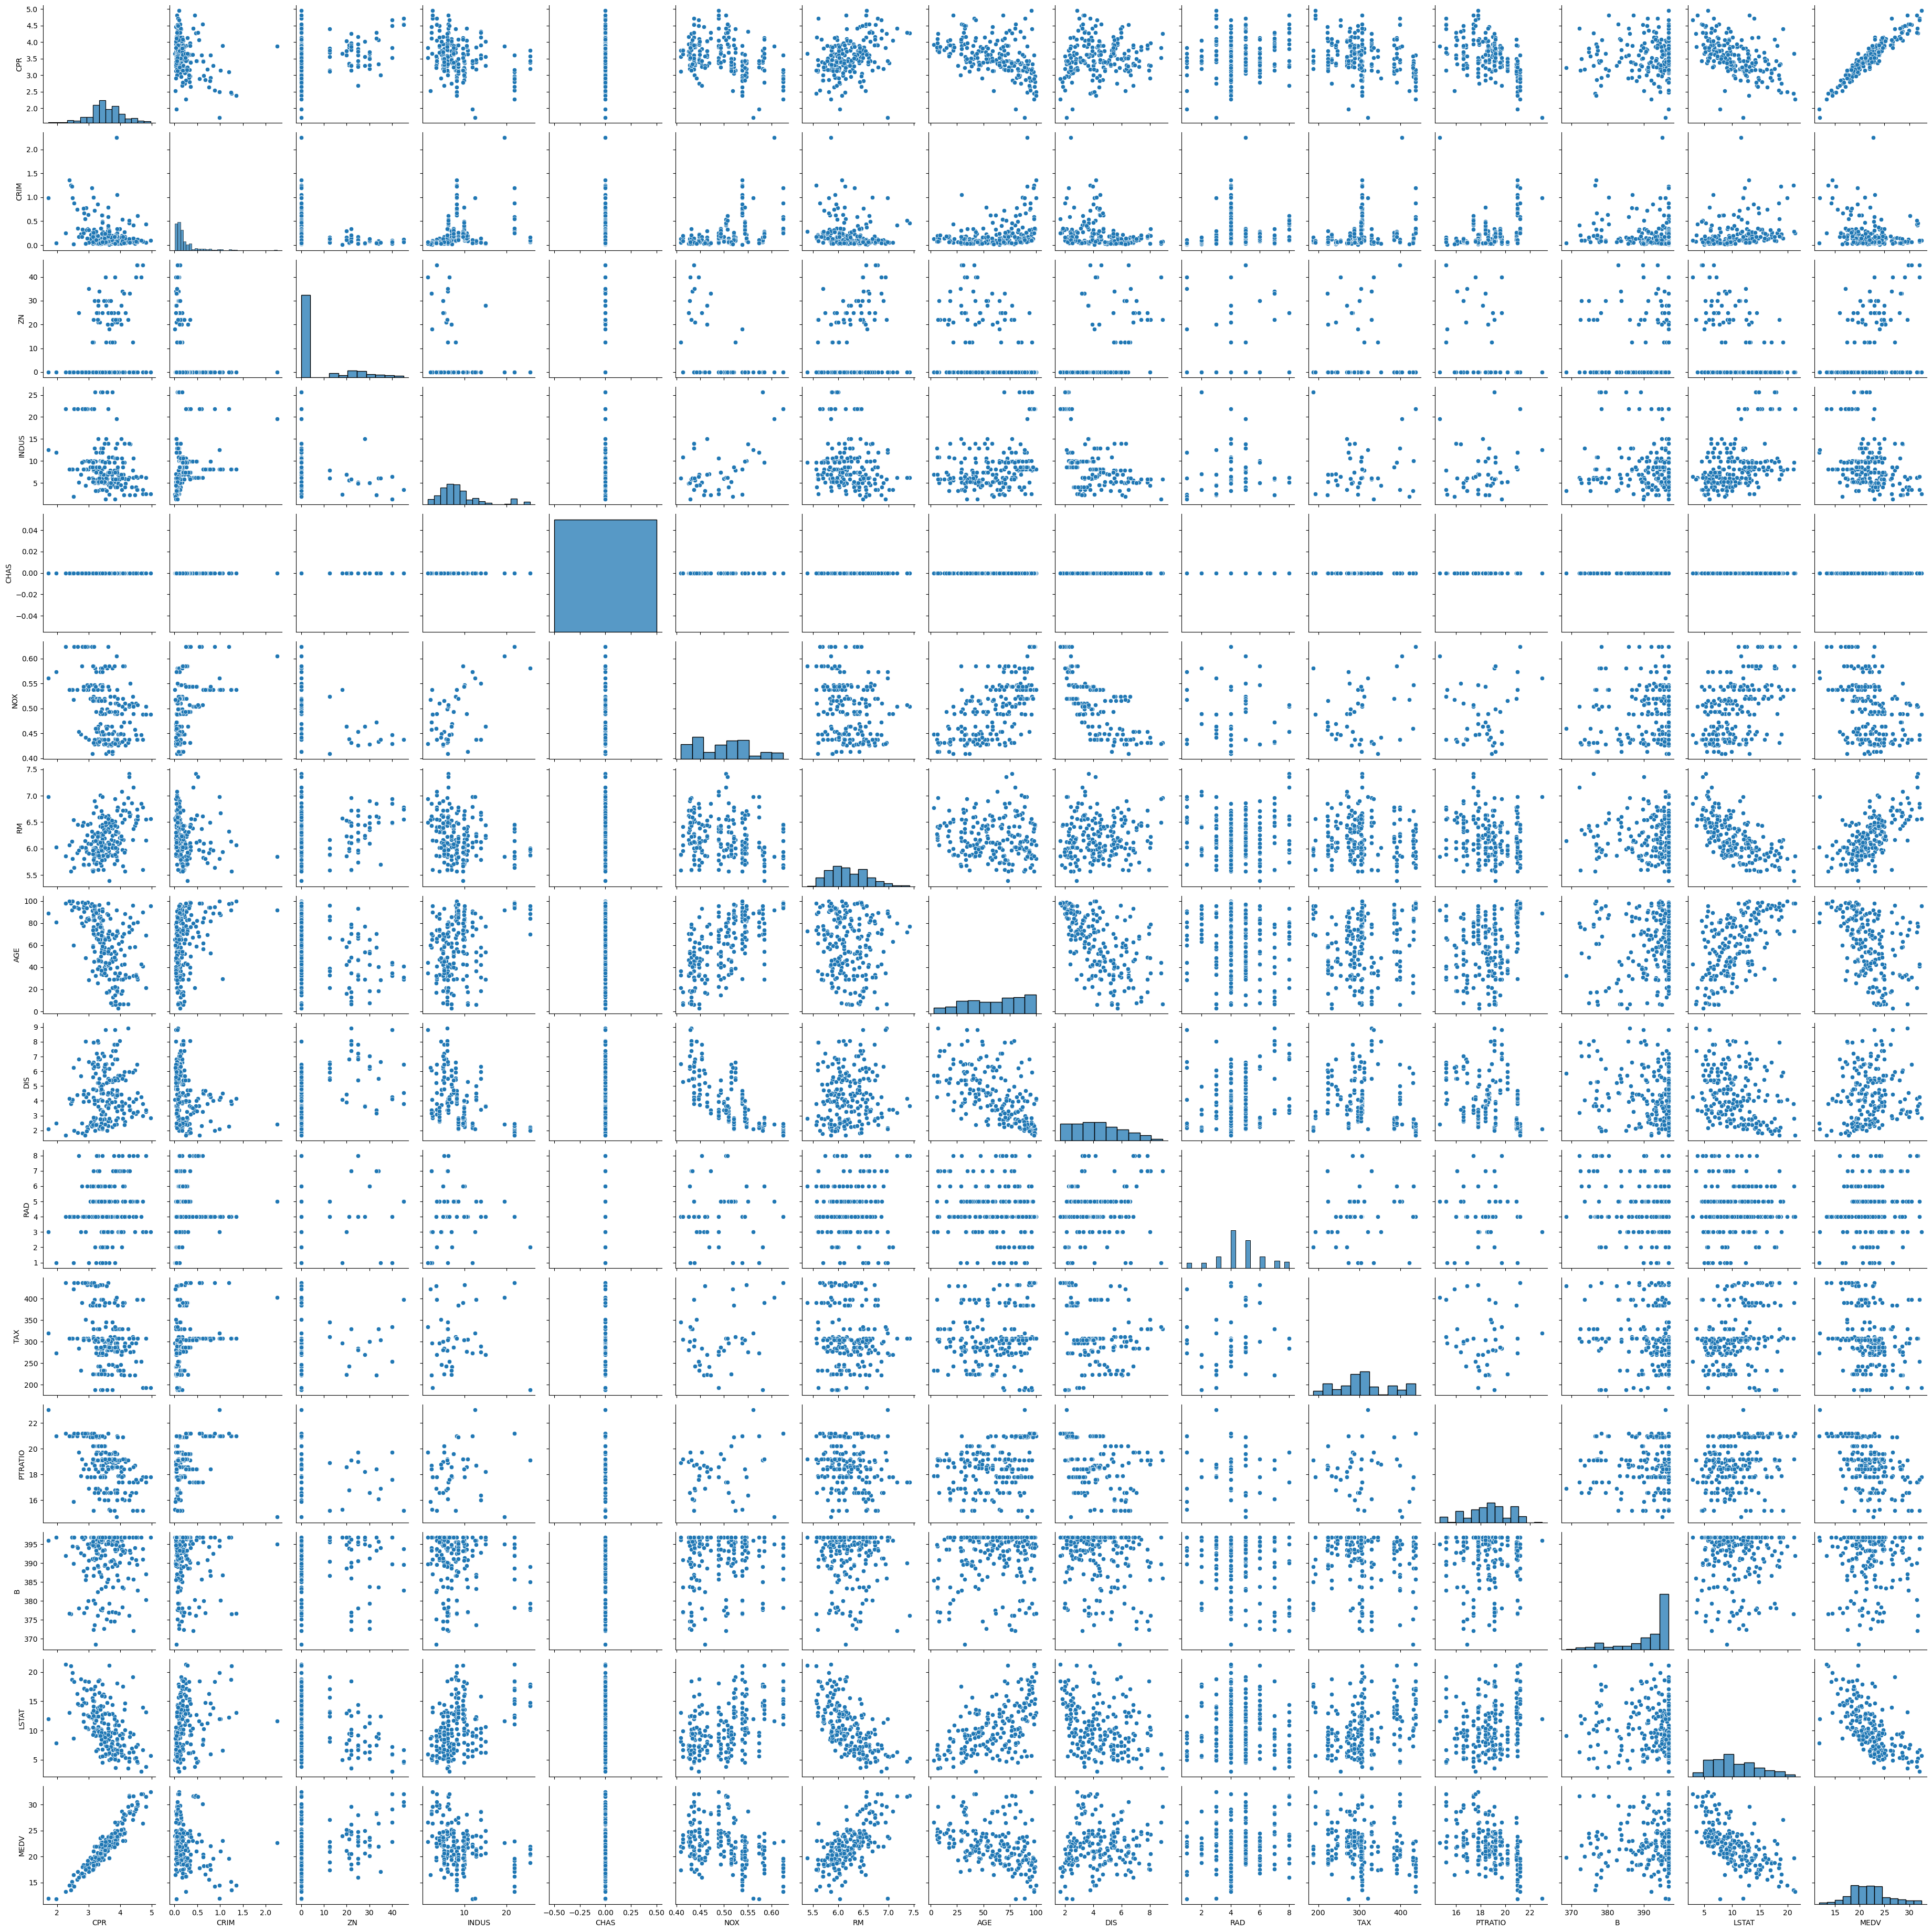

In [24]:
sns.pairplot(df_filtered)
plt.show()

По графикам тяжело определить корреляции, но, например, можно сказать, что между CPR и MEDV есть положительная корреляция, это логично, учитывая что при добавлении одна переменная зависела от другой.

## Применение метода K-Means для снижения размерности кластеров

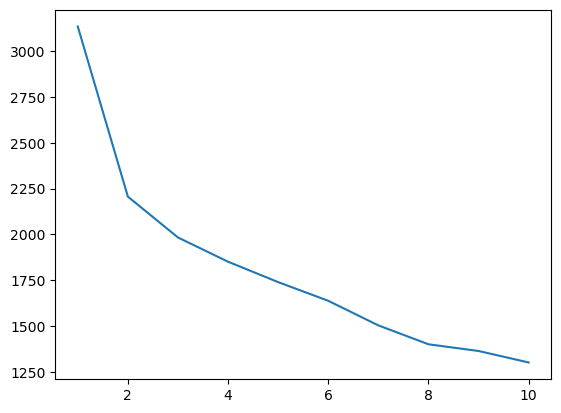

In [30]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filtered)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.show()
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)
df_filtered['Cluster'] = kmeans.labels_

## Кластеры
Построим график с кластерами:

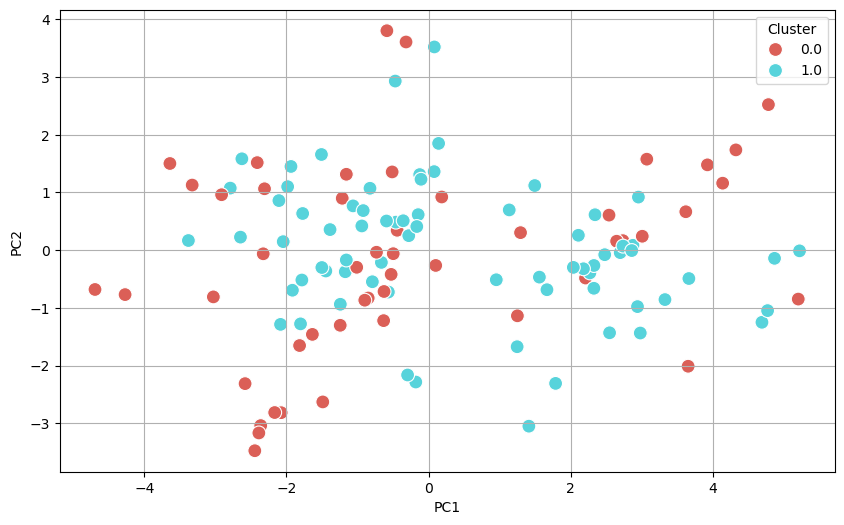

In [32]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df_filtered['Cluster']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='hls', s=100)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

## Вывод
В этой лабораторной работе мы занимались добавлением нового атрибута, обработкой данных ("причёсыванием") датасета, а затем мы сделали кластеризацию данных с помощью метода KMeans и показали на графике сами кластеры. Сам график был построен с помощью метода главной компоненты и представляет из себя график с двумя основными кластерами, которые пересекаются между друг другом, то есть сгруппированы. Можно заметить две примерно сгрупированные части кластеров. Также есть кластеры, находящиеся имеющие сильно отличный набор данных (так как они находятся на значительном расстоянии от основной точки сгруппирования кластеров).